# Supervised fully convolutional neural network for fault recognition in 3D seismic images trained using a small dataset.

# Step 3: Testing the trained Model

In [12]:
from keras.models import load_model
import tensorflow as tf

import os
import sys
import random

import numpy as np
import numpy.ma as ma
import cv2
import matplotlib.pyplot as plt
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
from mpl_toolkits.axes_grid1 import make_axes_locatable

## load the trained model

In [13]:
model = tf.keras.models.load_model('results/pre-trained model/FaultRecogCNN.h5')

## set some data parameters

In [14]:
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

im_height = 256
im_width = 256
im_chan = 3

testing_path = 'data/TestingData/'
testing_ids = next(os.walk(testing_path+"images"))[2]
test_X = np.zeros((len(testing_ids), im_height,im_width,im_chan), dtype=np.uint8)
sizes_test = []

## load and resize the testing dada

In [15]:
def LoadResizeTestData():
    
    print('Getting and resizing testing data ... ') 

    for n, id_ in tqdm(enumerate(testing_ids), total=len(testing_ids)):
        path = testing_path 
        img = imread(path + '/images/' + id_ )[:,:,:im_chan]
        sizes_test.append([img.shape[0], img.shape[1]])
        img = resize(img, (im_height,im_width,im_chan), mode='constant', preserve_range=True)
        test_X[n] = img
    print('Done!')
    print('[Xtest] = testing images:', test_X.shape)
    print('###################################################################################')
    print('Now all the testing data have been well imported!')
LoadResizeTestData()

Getting and resizing testing data ... 


100%|██████████| 6/6 [00:00<00:00, 13.53it/s]


Done!
[Xtest] = testing images: (6, 256, 256, 3)
###################################################################################
Now all the testing data have been well imported!


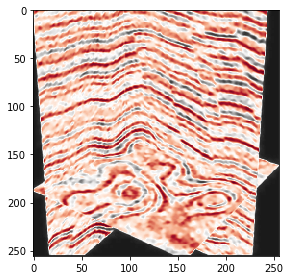

In [24]:
test_sample = random.randint(0, len(testing_ids))
imshow(test_X[test_sample,...,1], cmap ='RdGy')
plt.show()

## predict faults on testing data

In [25]:
TestSamples = random.randint(0, len(test_X))
FaultPrediction = model.predict(test_X, verbose=1)
Threshold = (FaultPrediction > 0.5).astype(np.uint8)

6/1 [====================================================================================================================================================================================] - 0s 81ms/sample


## make effective faul recognition on a random testing data

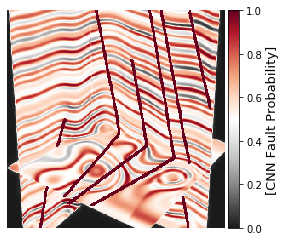

In [27]:
#FaultRecognition = random.randint(0, len(Threshold))
def FaultRecogPlot():
    Prob = ma.masked_where(np.squeeze(Threshold[FaultRecognition]) <1, np.squeeze(Threshold[FaultRecognition]))
    Img = ma.masked_array(test_X[FaultRecognition,...,1], Prob)
    
    fig, (ax) = plt.subplots(figsize=(5,4), ncols=1)

    ProbMap = ax.imshow(np.squeeze(Threshold[FaultRecognition]),cmap ='RdGy_r')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(ProbMap, cax=cax, orientation='vertical')
    cbar.set_label('[CNN Fault Probability]',fontsize=13)
    ax.axis('off');
    FaultRecogImg = ax.imshow(Img, cmap ='RdGy')#, alpha=0.3)
    #plt.savefig("results/test/1.tiff", dpi=1200)

FaultRecogPlot()